### Creating an Artistic Rendering of a City

Contextily provides an easy way to render tiles for a location using the OpenStreetMap's Nominatim API. Any location name from OpenStreetMap can be geocoded and displayed using the [Contextily Place API](https://contextily.readthedocs.io/en/latest/places_guide.html).

We can use it to quickly create a high-resolution rendering of any city using any supported basemap with exact dimensions.

#### Setup
The following blocks of code will install the required packages and download the datasets to your Colab environment.

In [ ]:
%%capture
if 'google.colab' in str(get_ipython()):
  !pip install contextily

In [ ]:
import contextily as cx
from contextily import Place
import matplotlib.pyplot as plt
import os

In [ ]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

#### Procedure

Replace the `place_name` below with the name of your chosen city, region or neighborhood and run it to query for its coordinates and bounding box for OpenStreetMap. If your query fails, you can visit [OpenStreetMap](https://www.openstreetmap.org/) and search for it to find the exact spelling of the place.

In [ ]:
place_name = 'Ahmedabad, India'
place = Place(place_name, zoom=13)

In [ ]:
fig, ax = plt.subplots(1, 1)
place.plot(ax=ax)
ax.set_axis_off()
plt.tight_layout()
plt.show()

You can choose from over 200 basemap styles created by different providers. Check the available styles using `contextily.providers`.

In [ ]:
providers = cx.providers
providers

Let's try the award-winning [*Watercolor*](https://www.cooperhewitt.org/2023/08/27/nda-stamen-design-watercolor-maps/) style by Stamen. Stamen basemaps are hosted by Stadia and require an API key to use. You can [sign-up and obtain a free API key](https://stadiamaps.com/stamen/). Once done, replace `YOUR-API-KEY` with your actual API key below.

In [ ]:
source = cx.providers.Stadia.StamenWatercolor(api_key='YOUR-API-KEY')
source['url'] = source['url'] + '?api_key={api_key}'

zoom = 13

In [ ]:
place = Place(place_name, zoom=zoom, source=source)

fig, ax = plt.subplots(1, 1)
place.plot(ax=ax)
ax.set_axis_off()
plt.tight_layout()
plt.show()

The Place API returns the rendering of the city based on its boundng box.

In [ ]:
place = Place(place_name)
x_min, x_max, y_min, y_max = place.bbox_map
print('Original BBOX', x_min, x_max, y_min, y_max)

If we wanted to create a rendering for exact dimensions, we have to adjust the default bounding box. Here we want to create a rendering that will fit exactly to the chosen paper size. We compute the required ratio and adjust the bounds so the resulting ratio matches our paper size.

In [ ]:
# Here we are using A4 paper size in Portrait orientation
# Swap width and height for Landscape orientation
# or choose any other dimensions
paper_height = 11.69
paper_width = 8.27

ratio = paper_width/paper_height

x_size = x_max - x_min
y_size = y_max - y_min

if ratio > 0:
  # adjust width
  x_size_required = ratio*(y_max - y_min)
  difference =  x_size_required - x_size
  x_min = x_min - difference/2
  x_max = x_max + difference/2
else:
  # adjust height
  y_size_required = ratio*(x_max - x_min)
  difference =  y_size_required - y_size
  y_min = y_min - difference/2
  y_max = y_max + difference/2
print('Adjusted BBOX', x_min, x_max, y_min, y_max)

Now we have the bounding box cooridnates, we can use the `bounds2img` method to fetch the tiles and create a map. The final rendering is saved as a PNG file in the Colab localstorage. You can open the **Files** tab from the left-hand panel in Colab and browse to the output folder. Locate the `basemap.png` file and click the **⋮** button and select Download to download the file locally.

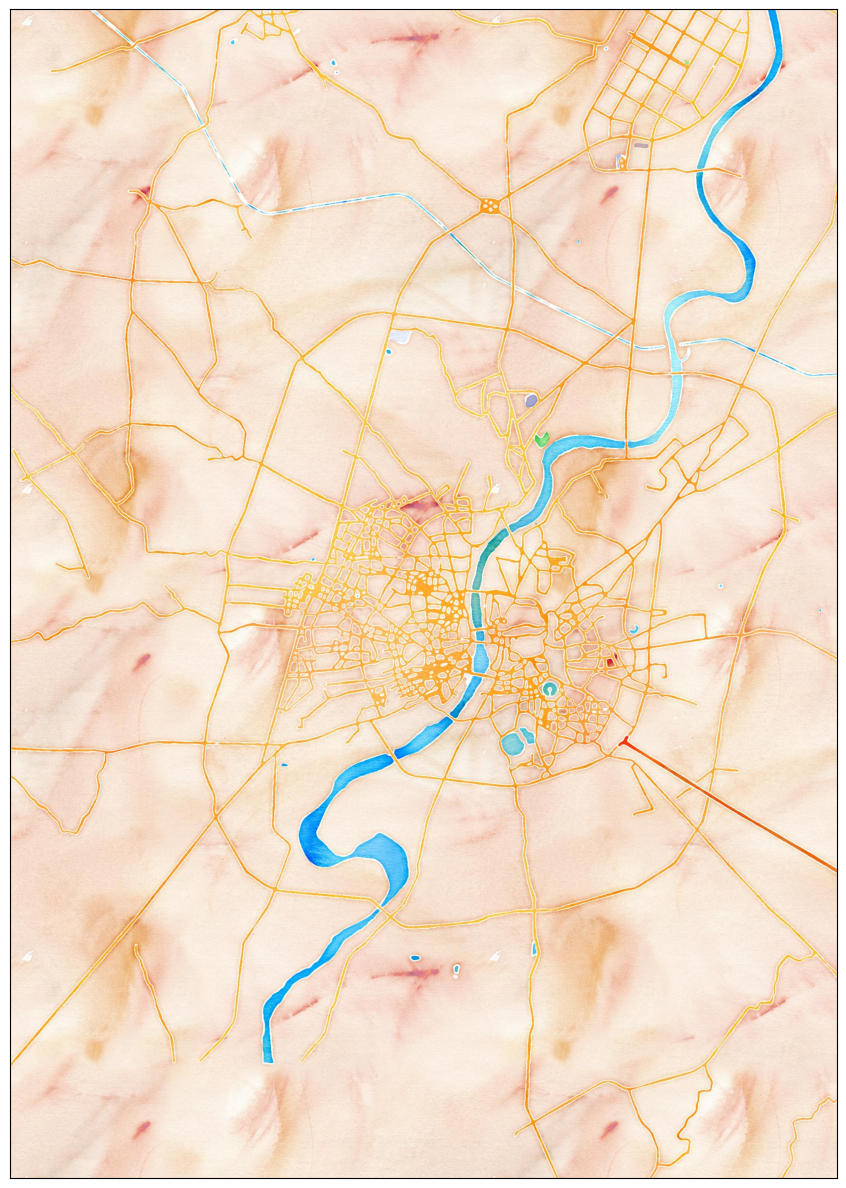

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(paper_width, paper_height)

basemap, extent = cx.bounds2img(x_min, y_min, x_max, y_max, zoom=zoom, source=source)
ax.imshow(basemap, extent=extent)

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout(pad=0)

output_file = 'basemap.png'
output_path = os.path.join(output_folder, output_file)
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()